In [172]:
from datetime import datetime

# envs = ['Ant-v2', 'HalfCheetah-v2', 'Reacher-v2', 'InvertedPendulumPyBulletEnv-v0']
envs = ['InvertedPendulumPyBulletEnv-v0', 'Walker2DPyBulletEnv-v0', 'HalfCheetahPyBulletEnv-v0']
algs = ['ddpg', 'td3', 'sac']

performance = {}

for env in envs:
    performance[env] = {}
    for alg in algs:
        file = open('Colab\\' + env + '_' + alg + '\\performance.txt', 'r', encoding='utf-8')
        lines = file.readlines()
        performance[env][alg] = [[], [], []]
        for i in range(len(lines) - 2):
            lines[i] = lines[i][:-1]
            if i > 2:
                vars = lines[i].split(' ')
                if i == 3:
                    first_time = datetime.strptime(vars[0] + '-' + vars[1], '%Y-%m-%d-%H:%M:%S.%f')
                performance[env][alg][0].append(int(vars[4]))
                performance[env][alg][1].append(float(vars[12]))
                performance[env][alg][2].append(float(
                    (datetime.strptime(vars[0] + '-' + vars[1], '%Y-%m-%d-%H:%M:%S.%f') - first_time).total_seconds() / 60.0
                ))
        file.close()

colors = ['red', 'blue', 'green']

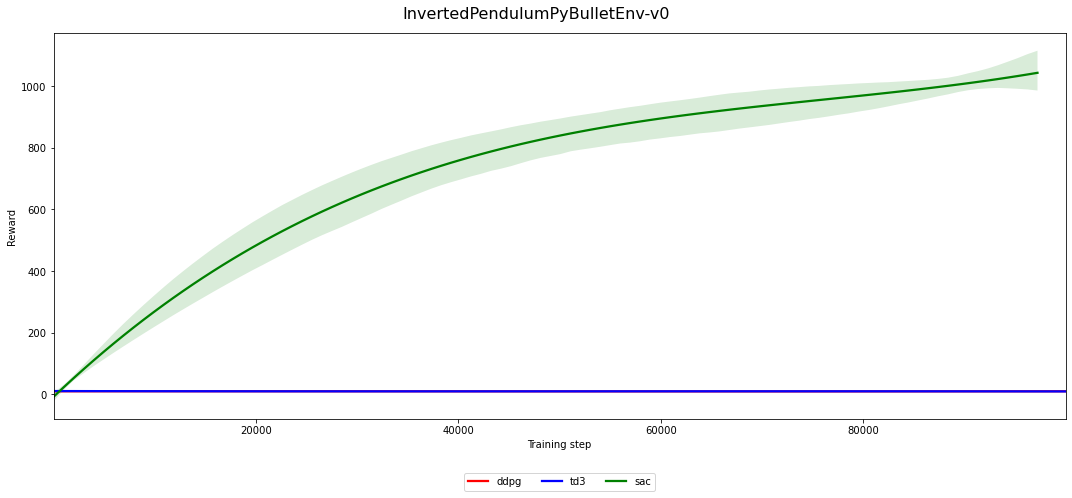

In [153]:
import seaborn as sns

env_n = 0

fig = plt.figure(figsize = (15, 7))
plt.xlabel('Training step')
plt.ylabel('Reward')
title = fig.suptitle(envs[env_n], fontsize=16)
for i in range(len(algs)):
    sns.regplot(
        x=performance[envs[env_n]][algs[i]][0],y=performance[envs[env_n]][algs[i]][1], 
        fit_reg=True, scatter=False, order=3, label=algs[i], color=colors[i]
    )
lgd = plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.2), ncol = 3)

fig.tight_layout()
fig.savefig(envs[env_n]+'_smoothed.pdf', bbox_extra_artists=(lgd,title,), bbox_inches='tight')

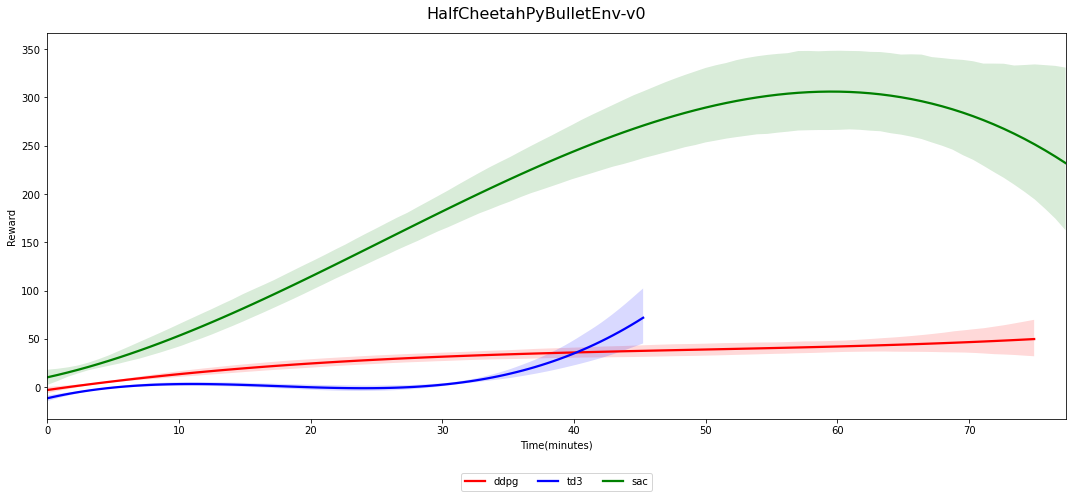

In [185]:
import seaborn as sns

env_n = 2

fig = plt.figure(figsize = (15, 7))
plt.xlabel('Time(minutes)')
plt.ylabel('Reward')
title = fig.suptitle(envs[env_n], fontsize=16)
for i in range(len(algs)):
    sns.regplot(
        x=performance[envs[env_n]][algs[i]][2],y=performance[envs[env_n]][algs[i]][1], 
        fit_reg=True, scatter=False, order=3, label=algs[i], color=colors[i]
    )
lgd = plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.2), ncol = 3)

fig.tight_layout()
fig.savefig(envs[env_n]+'_smoothed_time.pdf', bbox_extra_artists=(lgd,title,), bbox_inches='tight')

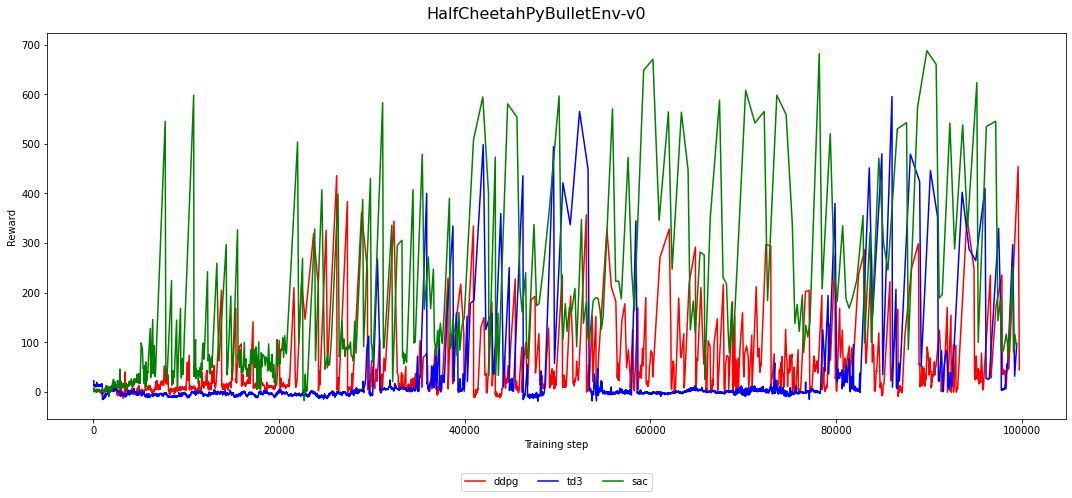

In [150]:
import matplotlib.pyplot as plt

env_n = 2

fig = plt.figure(figsize = (15, 7))
plt.xlabel('Training step')
plt.ylabel('Reward')
title = fig.suptitle(envs[env_n], fontsize=16)
for i in range(len(algs)):
    plt.plot(performance[envs[env_n]][algs[i]][0], performance[envs[env_n]][algs[i]][1], label=algs[i], color=colors[i])
lgd = plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.2), ncol = 3)

fig.tight_layout()
fig.savefig(envs[env_n]+'.pdf', bbox_extra_artists=(lgd,title,), bbox_inches='tight')

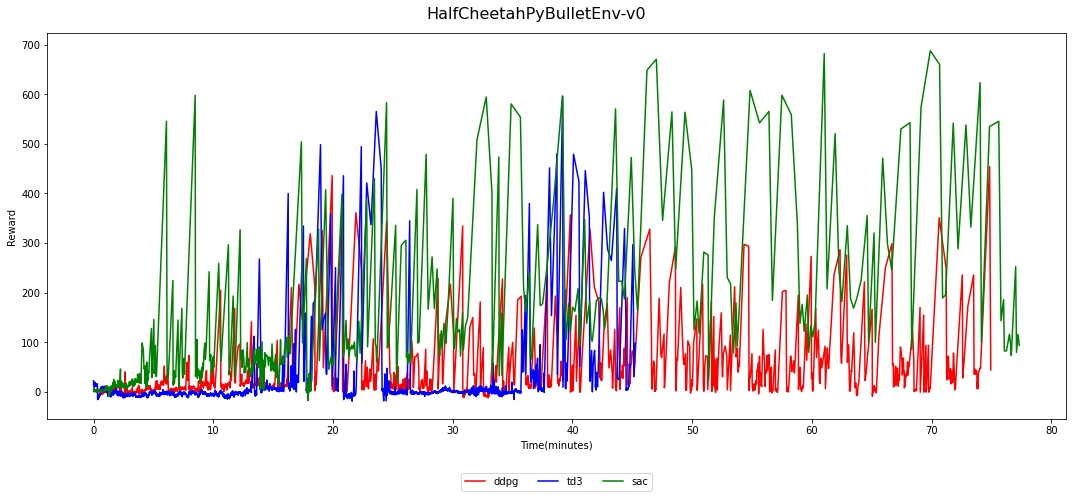

In [182]:
import matplotlib.pyplot as plt

env_n = 2

fig = plt.figure(figsize = (15, 7))
plt.xlabel('Time(minutes)')
plt.ylabel('Reward')
title = fig.suptitle(envs[env_n], fontsize=16)
for i in range(len(algs)):
    plt.plot(performance[envs[env_n]][algs[i]][2], performance[envs[env_n]][algs[i]][1], label=algs[i], color=colors[i])
lgd = plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.2), ncol = 3)

fig.tight_layout()
fig.savefig(envs[env_n]+'_time.pdf', bbox_extra_artists=(lgd,title,), bbox_inches='tight')